In [12]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted

In [2]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches

# Single run plot

In [43]:
df_pinn_burgers = load_tensorboard("runs/burgers_pinn_run_0/")
df_bayes_burgers = load_tensorboard("runs/burgers_bayes_run_0/")

df_pinn_kdv = load_tensorboard("runs/kdv_pinn_run_0/")
df_bayes_kdv = load_tensorboard("runs/kdv_bayes_run_0/")

In [44]:
coeff_keys_pinn = natsorted(filter(lambda key: key.find('coeff') == 0, df_pinn_burgers.keys()))
coeff_keys_bayes = natsorted(filter(lambda key: key.find('coeffs') == 0, df_bayes_burgers.keys()))

In [61]:
# Calculatin coefficient error
true_coeffs_burgers = np.zeros((12, ))
true_coeffs_burgers[2] = 0.1
true_coeffs_burgers[5] = -1

df_pinn_burgers["coeff_MAE"] = np.mean(np.abs(df_pinn_burgers[coeff_keys_pinn].to_numpy() - true_coeffs_burgers), axis=1) / np.linalg.norm(true_coeffs_burgers)
df_bayes_burgers["coeff_MAE"] = np.mean(np.abs(df_bayes_burgers[coeff_keys_bayes].to_numpy() - true_coeffs_burgers), axis=1) / np.linalg.norm(true_coeffs_burgers)

In [62]:
# Calculating coefficient error
true_coeffs_kdv = np.zeros((12, ))
true_coeffs_kdv[3] = -1
true_coeffs_kdv[5] = -6

df_pinn_kdv["coeff_MAE"] = np.mean(np.abs(df_pinn_kdv[coeff_keys_pinn].to_numpy() - true_coeffs_kdv), axis=1) / np.linalg.norm(true_coeffs_kdv)
df_bayes_kdv["coeff_MAE"] = np.mean(np.abs(df_bayes_kdv[coeff_keys_bayes].to_numpy() - true_coeffs_kdv), axis=1) / np.linalg.norm(true_coeffs_kdv)

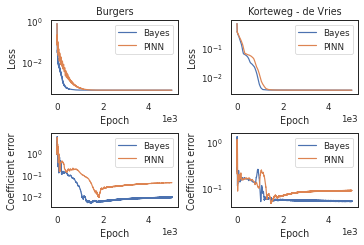

In [77]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(0.9 * col_width, 0.6 * col_width), constrained_layout=True)

ax = axes[0, 0]
ax.plot(df_bayes_burgers.index, df_bayes_burgers.mse + df_bayes_burgers.reg, label="Bayes")
ax.plot(df_pinn_burgers.index, df_pinn_burgers.mse + df_pinn_burgers.reg, label="PINN")
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.legend()
ax.set_title('Burgers')

ax = axes[1, 0]
ax.plot(df_bayes_burgers.index, df_bayes_burgers.coeff_MAE, label="Bayes")
ax.plot(df_pinn_burgers.index, df_pinn_burgers.coeff_MAE, label="PINN")
ax.set_yscale('log')
ax.set_ylabel("Coefficient error")
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.legend()


ax = axes[0, 1]
ax.plot(df_bayes_kdv.index, df_bayes_kdv.mse + df_bayes_kdv.reg, label="Bayes")
ax.plot(df_pinn_kdv.index, df_pinn_kdv.mse + df_pinn_kdv.reg, label="PINN")
ax.set_yscale('log')
ax.set_ylabel("Loss")

ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.legend()
ax.set_title('Korteweg - de Vries')


ax = axes[1, 1]
ax.plot(df_bayes_kdv.index, df_bayes_kdv.coeff_MAE, label="Bayes")
ax.plot(df_pinn_kdv.index, df_pinn_kdv.coeff_MAE, label="PINN")
ax.set_ylabel("Coefficient error")
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.set_yscale('log')
ax.legend()

plt.savefig('bayesian_regression_experiments.pdf', bbox_inches='tight')

In [68]:
df_bayes_kdv[coeff_keys_bayes].tail(1)

,coeffs_0,coeffs_1,coeffs_2,coeffs_3,coeffs_4,coeffs_5,coeffs_6,coeffs_7,coeffs_8,coeffs_9,coeffs_10,coeffs_11
4999,-0.004212,-0.30879,0.144012,-0.964538,-0.085996,-4.746207,-0.295611,0.121537,0.090848,-1.046368,0.11185,-0.145451
